<a href="https://colab.research.google.com/github/LuisFelipeGarcia2001/data-science/blob/main/Ecommerce%20customers/Ecommerce_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de estudo para Regressão Linear

Teremos nesse dataset um E-commerce baseado na vendas de roupas na cidade de Nova York, mais o estabelecimento tem um site e um app para celular para que os clientes possam comprar.

A companhia está tentando decidir qual deverá ser o foco, em seu app ou site.

## Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Coletando os dados

Os dados estão em um arquivo csv da companhia. 
Entre os dados, temos informações dos cliente, como e-mail, endereço e a cor do seu avatar. Além disso, temos informações númericas que vamos usar para treinar o modelo, as colunas são:
* Avg. Session Length: Média de sessões com estilistas.
* Time on App: Média de tempo gasto no App, em minutos.
* Time on Website: Média de tempo gasto no site, em minutos.
* Length of Membership: Quantidade de anos desde que o cliente se tornou membro.


In [2]:
dados = 'https://raw.githubusercontent.com/LuisFelipeGarcia2001/data-science/main/Ecommerce%20customers/Ecommerce_customers'
clientes = pd.read_csv('https://raw.githubusercontent.com/LuisFelipeGarcia2001/data-science/main/Ecommerce%20customers/Ecommerce_customers')

**Checando as primeiras linhas do dataset, e suas informações (tipo, estatísticas).**

In [3]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [5]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise exploratória dos dados

**Let's explore the data!**



**Será que alguma correlação do tempo que um cliente passa no site e o quanto ele gasta?**

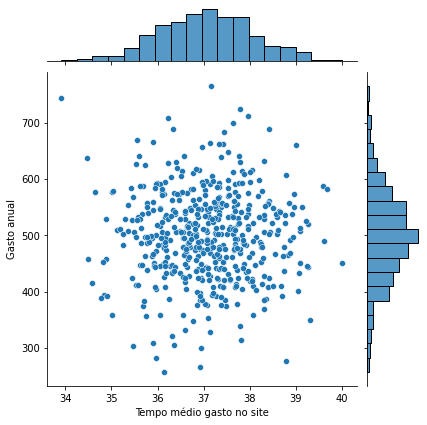

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes) \
.set_axis_labels('Tempo médio gasto no site', 'Gasto anual', fontsize=10)


Os dados estão muitos dispersos, não existem uma correlação entre o tempo gasto no site e a quantidade gasta na companhia.

**Fazendo o mesmo só que para o tempo gasto no App.**

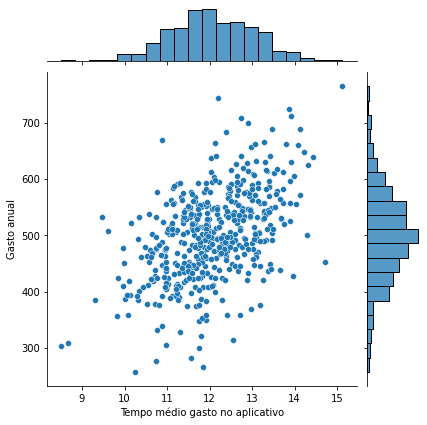

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes) \
.set_axis_labels('Tempo médio gasto no aplicativo', 'Gasto anual', fontsize=10)

Aqui já conseguimos ver um tendência de quanto mais tempo o cliente usa o aplicativo para celular, mais ele gasta.

**Agora criando um gráfico comparando o tempo no aplicativo com o tempo desde que o cliente é membro**

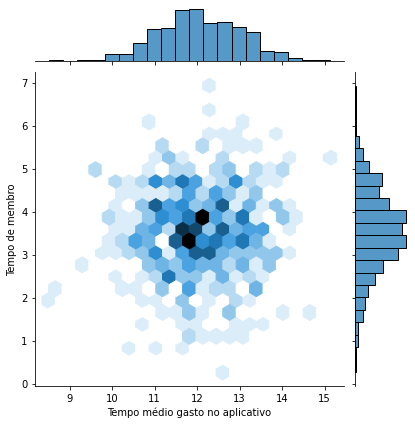

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex') \
.set_axis_labels('Tempo médio gasto no aplicativo', 'Tempo de membro', fontsize=10)

**Olhando o relacionamento das colunas ao longo do data set inteiro**

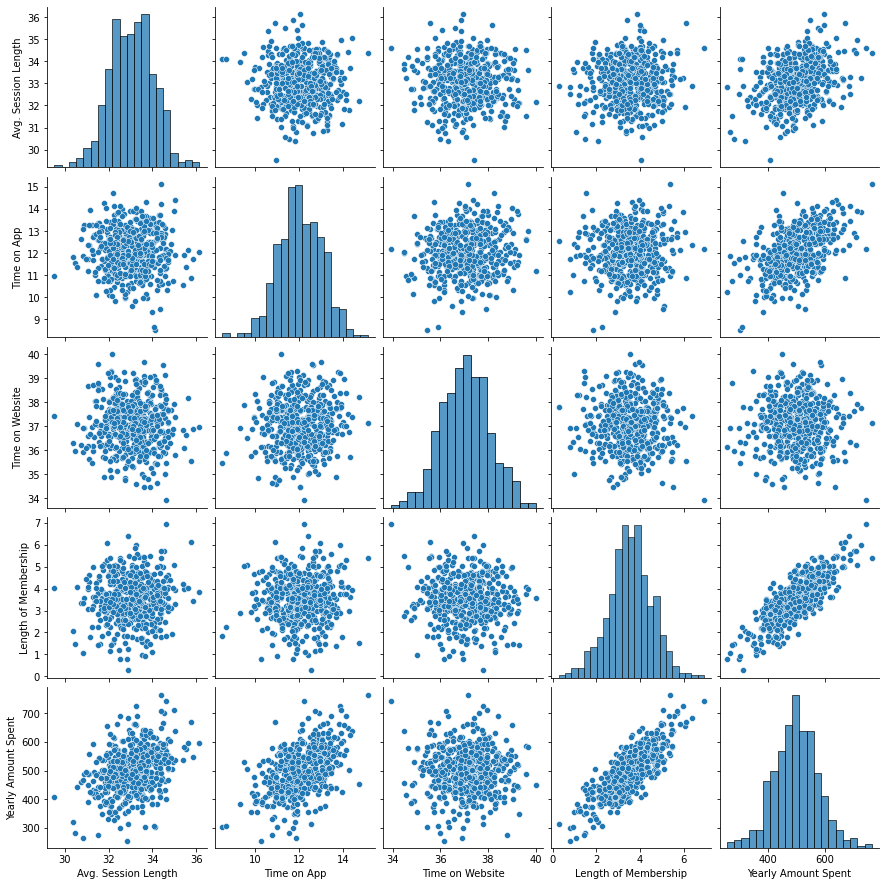

In [9]:
sns.pairplot(clientes)

Agora com o panorama total, vemos que a quantidade que um cliente gasta anualmente tem forte correlação com o tempo em que o cliente é membro.

**Plotando um gráfico com linear model para mostrar a correlação entre os parâmetros**

Text(0.5, 1.0, 'Gasto anual X Tempo de membro')

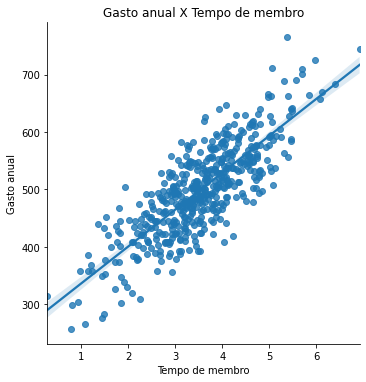

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)\
.set_axis_labels('Tempo de membro', 'Gasto anual', fontsize=10)
plt.title('Gasto anual X Tempo de membro')

Aqui temos mais explícito como as duas features se correlacionam.

## Treinando e testando o modelo

Primeiro criamos uma variável X com as features númericas dos clientes, e outra variável y com a coluna "Yearly Amount Spent"
Primeiro separamos os dados dos clientes em dois data frames diferentes, treino e teste.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [11]:
clientes.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X = clientes[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [13]:
y = clientes['Yearly Amount Spent']

Agora separamos os dados dos clientes em dois data frames diferentes, treino e teste. 67% para o treino e 33% para o teste. Com a variável randômica padronizada em 42 para que o resultado possa ser replicado.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42)

## Treinando o modelo

**Importando o modelo de Regressão Linear do sklearn**

In [16]:
from sklearn.linear_model import LinearRegression

**Instanciando o modelo**

In [17]:
modelo = LinearRegression()

**Treinando o modelo nos dados de treino**

In [18]:
modelo.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Mostrando os coeficientes do nosso modelo para cada feature**

In [19]:
coeficientes = pd.DataFrame(modelo.coef_,X.columns,columns=['Coeficiente'])
coeficientes.T

,Avg. Session Length,Time on App,Time on Website,Length of Membership
Coeficiente,25.706762,38.572608,0.625201,61.717676


Aqui temos que o quanto cada variável interfere no gasto anual do cliente, por exemplo a cada ano que o cliente é membro o gasto anual dele aumenta por volta de U$62.

## Prevendo os dados de teste
Agora chega a hora de avaliar a perfomance do modelo prevendo os dados de teste.


In [20]:
predicao = modelo.predict(X_teste)

Text(0.5, 1.0, 'Gráfico de pontos dos Dados reais X Predição')

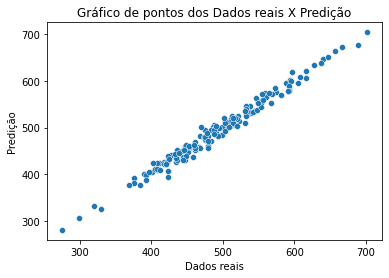

In [21]:
sns.scatterplot(x=y_teste, y=predicao)
plt.xlabel('Dados reais')
plt.ylabel('Predição')
plt.title('Gráfico de pontos dos Dados reais X Predição')

## Avaliando o modelo
**Calculado o Erro Absoluto médio, Erro quadrático médio, e o Erro quadrático médio da raiz.**


In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(y_teste, predicao))
print('MSE:', metrics.mean_squared_error(y_teste, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predicao)))

MAE: 8.353573525017625
MSE: 102.40428659932002
RMSE: 10.119500313717078


## Residual


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidade')

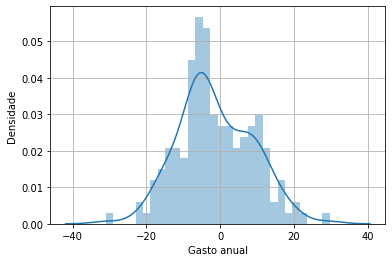

In [24]:
sns.distplot((y_teste - predicao),bins=30).grid(True)
plt.xlabel('Gasto anual')
plt.ylabel('Densidade')

## Conclusão

**Retomando os coeficientes**

In [25]:
coeficientes.T

,Avg. Session Length,Time on App,Time on Website,Length of Membership
Coeficiente,25.706762,38.572608,0.625201,61.717676


A partir disso, o que temos é que se a companhia focar no aplicativo, o retorno financeiro será muito maior, cerca de U$38,00, já que a correlação com o tempo no site não tem retorno visível.